<a href="https://colab.research.google.com/github/Saiteja797/FMML-LAB-1/blob/main/Mod_6_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions



```
Module Coordinator : Nikunj Nawal
```


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


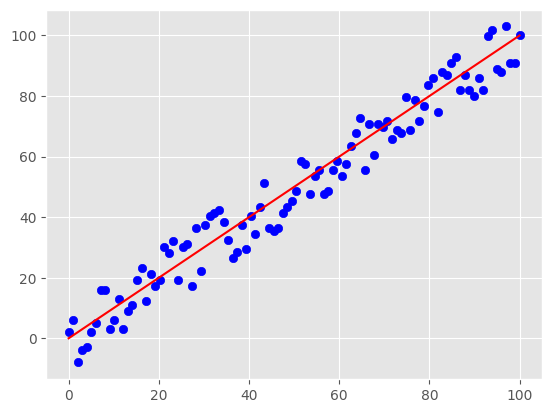

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

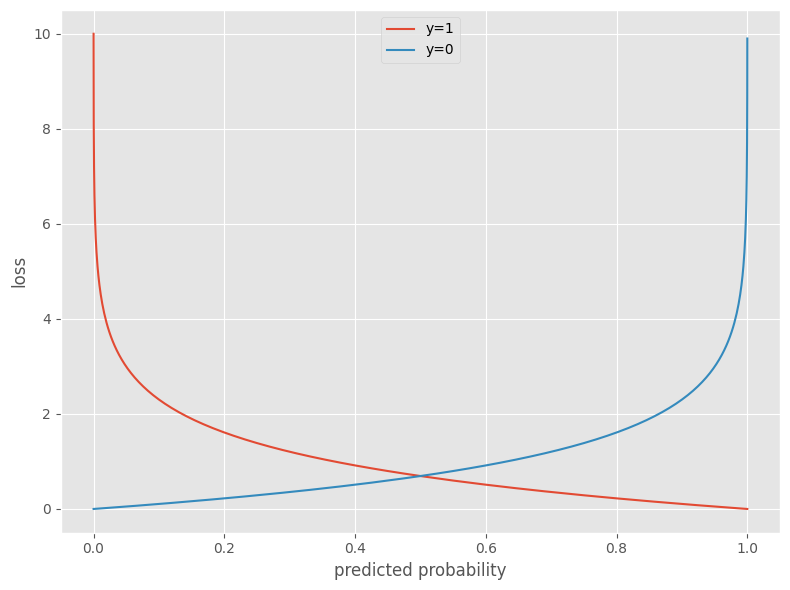

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

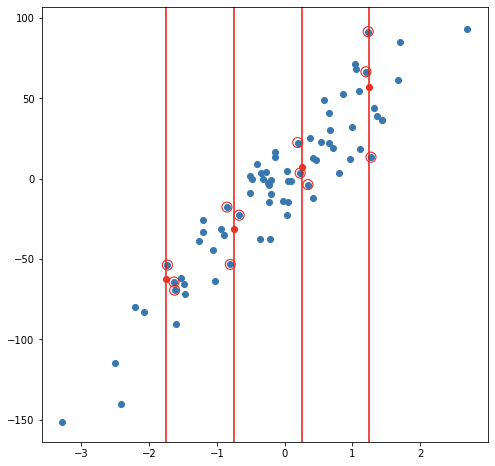

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

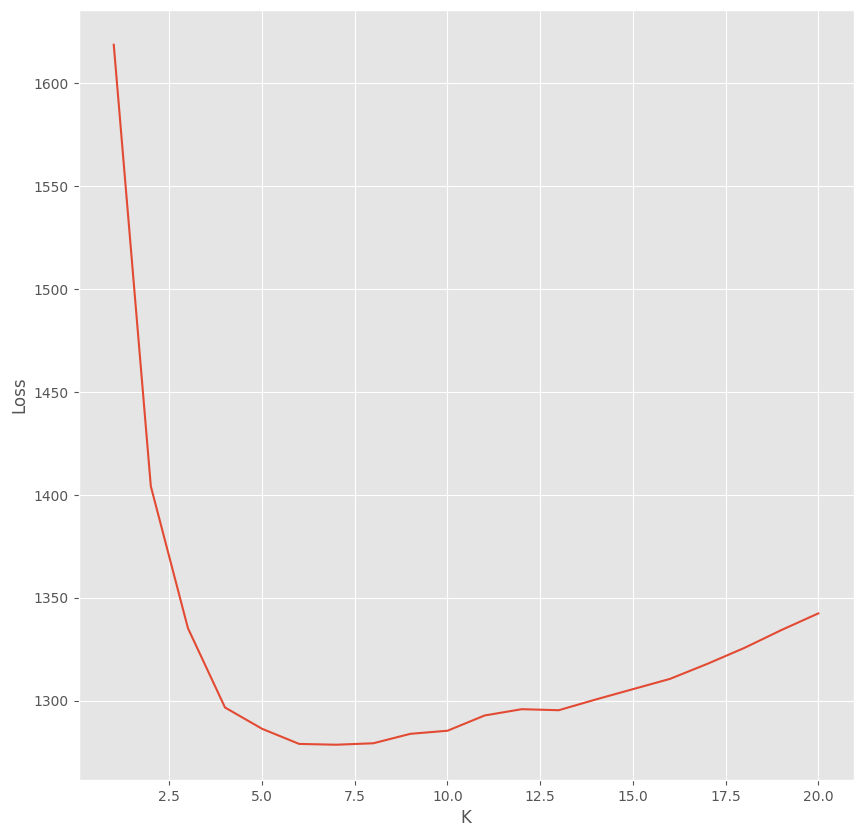

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
**Answer:-**Certainly! In regression tasks, the choice of loss function is crucial as it directly influences how the model learns and optimizes its parameters. Here are some common loss functions used in regression tasks and their characteristics:

Mean Squared Error (MSE):


Characteristics: Penalizes larger errors heavily. Suitable when you want the model to focus on reducing large errors.
Mean Absolute Error (MAE):


Characteristics: Gives equal weight to all errors, irrespective of their magnitude. Robust to outliers.
Huber Loss:

​

Characteristics: Combines MSE and MAE. It is less sensitive to outliers than MSE.
Log-Cosh Loss:


Log-Cosh Loss=log(cosh(error))
Characteristics: Similar to Huber Loss but with a smoother transition between MAE and MSE. It is less sensitive to outliers.
Quantile Loss (for quantile regression):

τ is the quantile level.
Characteristics: Useful for estimating prediction intervals. The choice of
τ determines the quantile level.
2. Explore other loss functions and try to understand when and why they are used.
**Answer:-**In addition to the commonly used loss functions mentioned earlier, there are several other loss functions designed for specific scenarios or addressing certain challenges in regression tasks. Let's explore a few more:

Weighted Loss Functions:

Use Case: When certain data points are more important than others or when there is class imbalance.
Idea: Assign different weights to different samples to emphasize or de-emphasize their impact on the overall loss. This is particularly useful when dealing with imbalanced datasets.
Poisson Loss:

Use Case: When the target variable follows a Poisson distribution, commonly used for count data (e.g., number of events occurring in fixed intervals).
Idea: Models the Poisson distribution and minimizes the negative log-likelihood of the observed counts.
Gamma Loss:

Use Case: Similar to Poisson Loss, appropriate for modeling positive continuous outcomes with a skewed distribution.
Idea: Minimizes the negative log-likelihood of the gamma distribution.
Tukey's Biweight Loss (aka Geman-McClure Loss):

Use Case: Robust regression in the presence of outliers.
Idea: Down-weights the contribution of outliers, making the loss less sensitive to extreme errors. It's robust against outliers and suitable when the dataset has noisy data points.
Epsilon-Insensitive Loss (for Support Vector Regression):

Use Case: In Support Vector Regression, where the goal is to minimize the deviation of predictions within a certain tolerance.
Idea: Introduces a margin of tolerance (ϵ) within which errors are not penalized. Points outside this margin contribute to the loss.
BerHu Loss (aka Huber Loss with δ set as a function of the data):

Use Case: Robust regression with adaptive tuning of the Huber loss parameter.
Idea: Similar to Huber Loss, but the threshold (δ) is dynamically adjusted based on the data distribution, offering a balance between the robustness of Huber Loss and the sensitivity of MSE.
Cosine Similarity Loss:

Use Case: When the similarity between predicted and true values is crucial.
Idea: Measures the cosine of the angle between the predicted and true vectors, emphasizing the direction rather than the magnitude of the vectors.
Triplet Loss (for Siamese Networks):

Use Case: Learning embeddings for similarity-based tasks.
Idea: Encourages the model to reduce the distance between similar examples and increase the distance between dissimilar examples.
3. Try out KNN-regression on other datasets see which values of K give the best results.
**Answer:-**Performing k-Nearest Neighbors (KNN) regression on different datasets and tuning the value of k is a valuable exercise for understanding the performance of the algorithm on various types of data. To do this, you can follow these general steps:

Load Datasets:

Choose a diverse set of regression datasets to assess how well KNN regression generalizes across different types of data. Examples include the Boston Housing dataset, California Housing dataset, or any other relevant regression dataset.
Preprocess Data:

Standardize or normalize the features if necessary.
Split the data into training and testing sets.
Implement KNN Regression:

Use a library like scikit-learn in Python to implement KNN regression.
Experiment with different distance metrics (e.g., Euclidean, Manhattan) to observe their impact on performance.
Tune Hyperparameter
k:Iterate over different values of k and train the KNN regressor for each value.
Evaluate the performance on the testing set using an appropriate metric (e.g., Mean Squared Error, R-squared).
Plot Results:
Create a plot to visualize how the performance metric changes with different values of k. This can help identify the optimal k value.

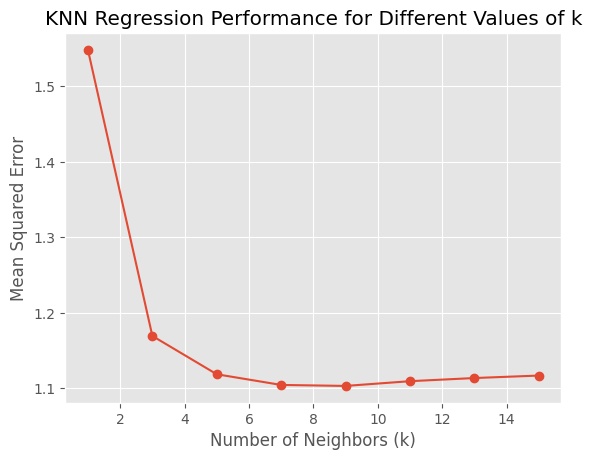

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different values of k
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
mse_scores = []

for k in k_values:
    # Create and fit the KNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot the results
plt.plot(k_values, mse_scores, marker='o')
plt.title('KNN Regression Performance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.show()
